In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
file_path = '/content/chunmoddel.csv'
data = pd.read_csv(file_path)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [ ]:
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
scaler = StandardScaler()
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

In [ ]:
X = data.drop(columns=['Exited'])
y = data['Exited']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

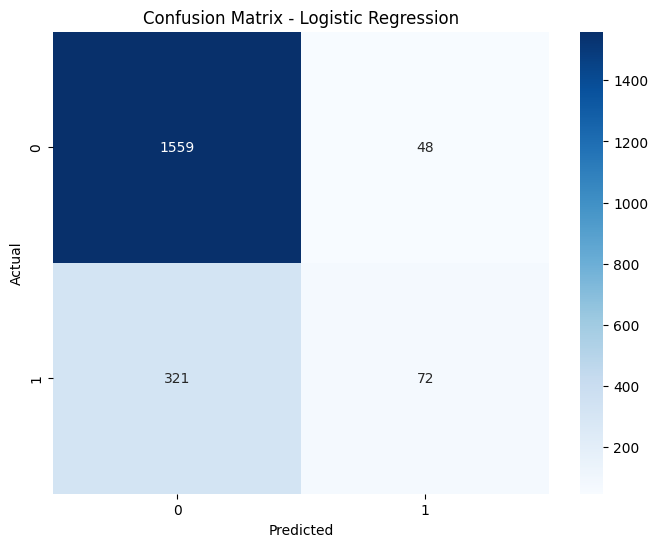

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

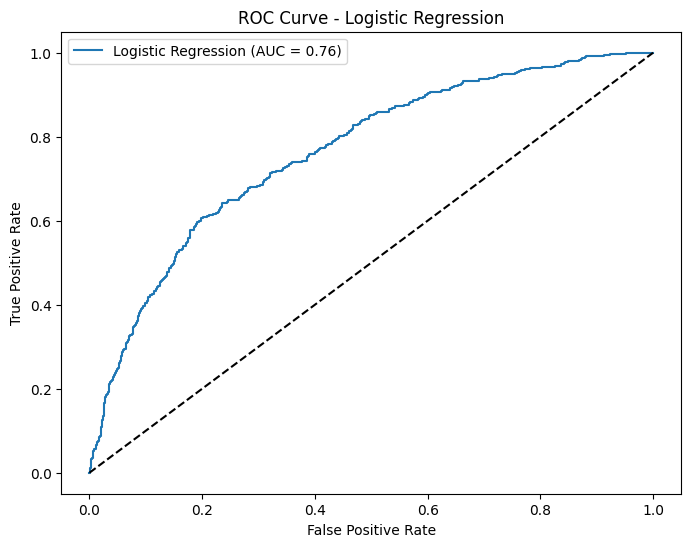

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

In [ ]:
print('Logistic Regression Metrics:')
print(f'Accuracy: {accuracy_log_reg:.4f}')
print(f'Precision: {precision_log_reg:.4f}')
print(f'Recall: {recall_log_reg:.4f}')
print(f'F1 Score: {f1_log_reg:.4f}')

Logistic Regression Metrics:
Accuracy: 0.8155
Precision: 0.6000
Recall: 0.1832
F1 Score: 0.2807


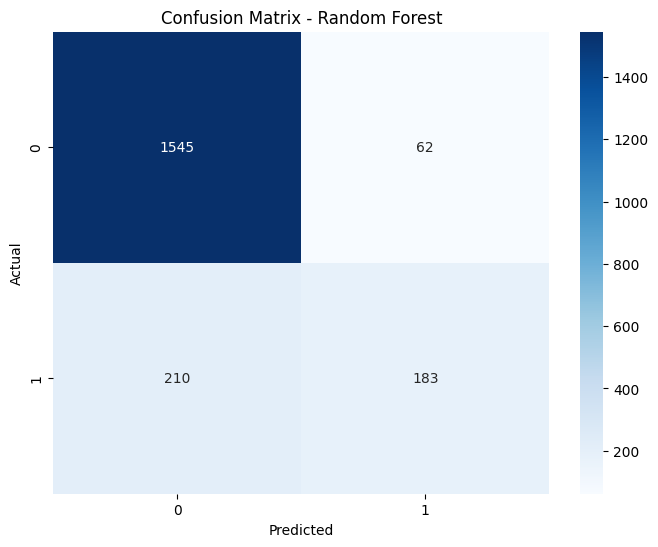

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

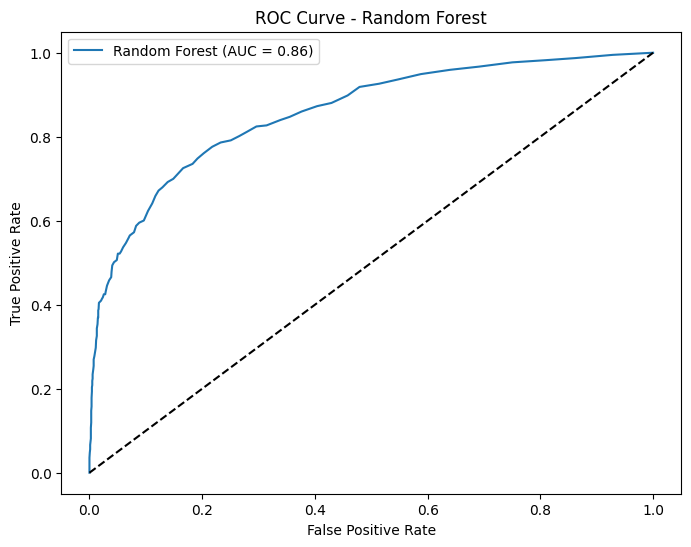

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

In [ ]:
print('Random Forest Metrics:')
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')

Random Forest Metrics:
Accuracy: 0.8640
Precision: 0.7469
Recall: 0.4656
F1 Score: 0.5737


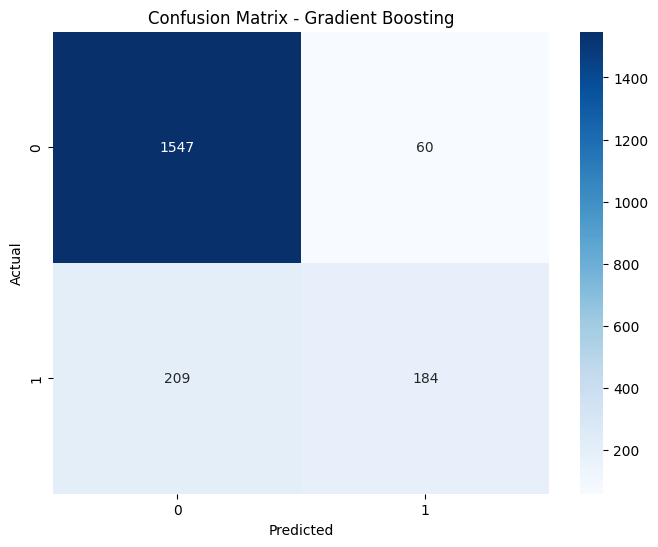

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

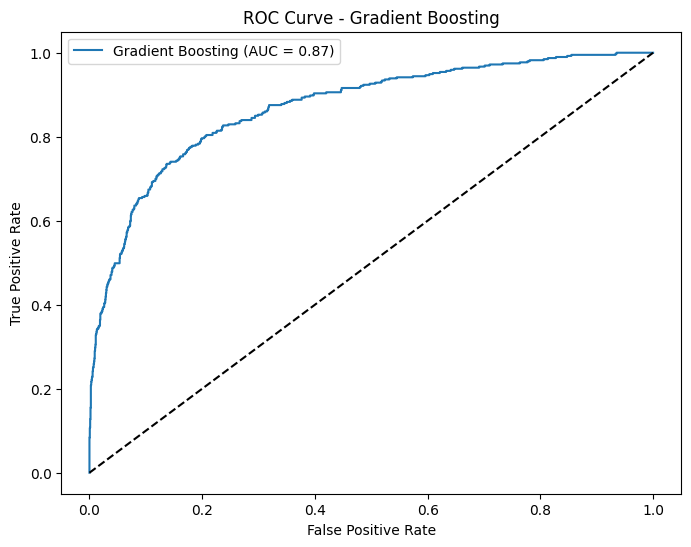

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.show()

In [ ]:
print('Gradient Boosting Metrics:')
print(f'Accuracy: {accuracy_gb:.4f}')
print(f'Precision: {precision_gb:.4f}')
print(f'Recall: {recall_gb:.4f}')
print(f'F1 Score: {f1_gb:.4f}')

Gradient Boosting Metrics:
Accuracy: 0.8655
Precision: 0.7541
Recall: 0.4682
F1 Score: 0.5777


In [ ]:
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
200/200 [==============================] - 3s 4ms/step - loss: 0.5433 - accuracy: 0.7528 - val_loss: 0.4688 - val_accuracy: 0.8012
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4548 - accuracy: 0.7972 - val_loss: 0.4227 - val_accuracy: 0.8188
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4211 - accuracy: 0.8148 - val_loss: 0.4028 - val_accuracy: 0.8313
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3995 - accuracy: 0.8305 - val_loss: 0.3867 - val_accuracy: 0.8375
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3836 - accuracy: 0.8400 - val_loss: 0.3768 - val_accuracy: 0.8431
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3734 - accuracy: 0.8452 - val_loss: 0.3706 - val_accuracy: 0.8419
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8498 - val_loss: 0.3662 - val_accuracy: 0.8444
Epoch 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print(f'Final accuracy: {accuracy:.4f}')
print(f'Final loss: {loss:.4f}')

Final accuracy: 0.8570
Final loss: 0.3530


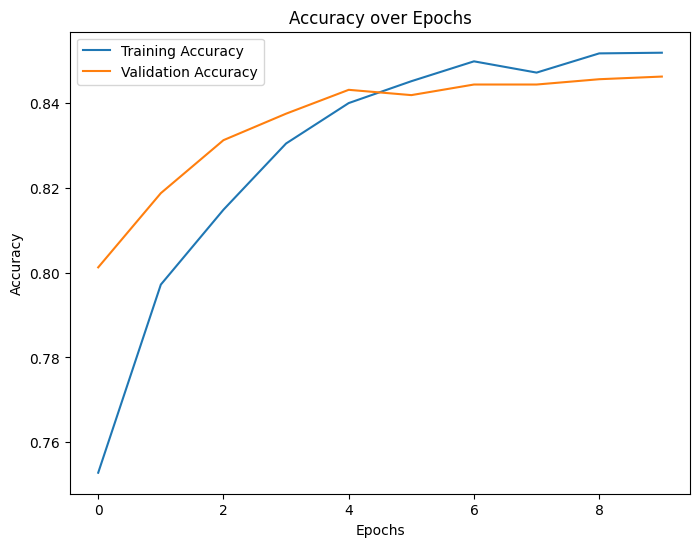

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

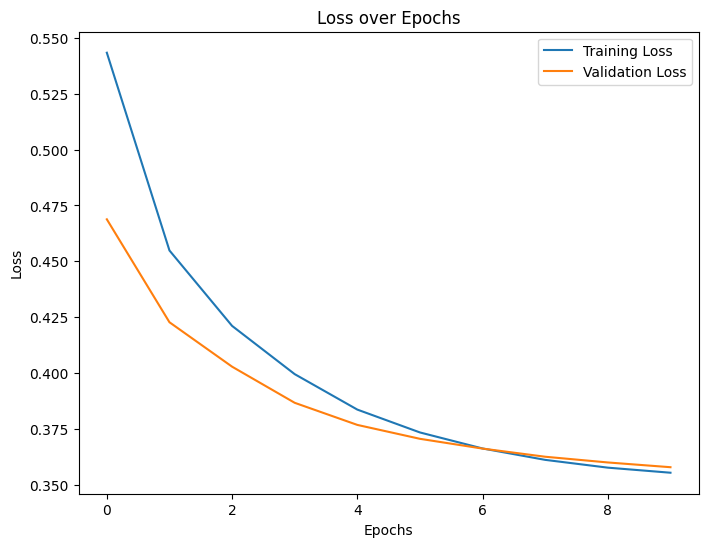

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()